# Embedding a 2D circle with t-SNE and UMAP and various initializations

In [19]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns
sns.set(context='paper', style='ticks', font='Arial')

from openTSNE import TSNE
from umap import UMAP

import openTSNE, umap
print('openTSNE', openTSNE.__version__)
print('umap', umap.__version__)

openTSNE 0.4.4
umap 0.4.6


In [21]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [7]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 2min 14s, sys: 1.11 s, total: 2min 15s
Wall time: 18.5 s


In [8]:
%%time

Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

CPU times: user 1min 5s, sys: 495 ms, total: 1min 5s
Wall time: 31.5 s


<IPython.core.display.Javascript object>


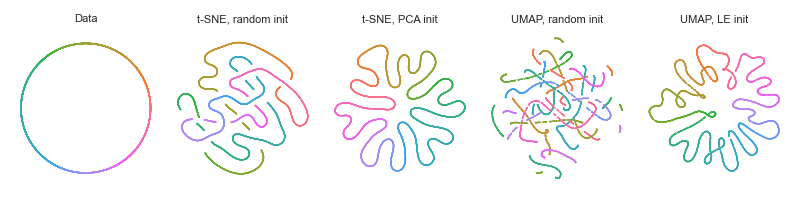

In [20]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 
          'UMAP, random init', 'UMAP, LE init']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X,Z1,Z2,Z3,Z4],1):
    plt.subplot(1,5,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('tsne-umap-circle.png', dpi=300)
plt.savefig('tsne-umap-circle.pdf', dpi=300)